# Perceptron Trick

- We run a loop (1000 iterations).
- We will choose the random point of the data from the graph.
- We will calculate if there is any point misclassified or not.
- If misclassified, we will make a line close to that using transformation.

The equation of line is: $Ax + By + C = 0$

- For points that satisfy $Ax + By + C \geq 0$, classify them as "Positive."
- For points that satisfy $Ax + By + C < 0$, classify them as "Negative."


###  Transformation of the line in perceptron trick
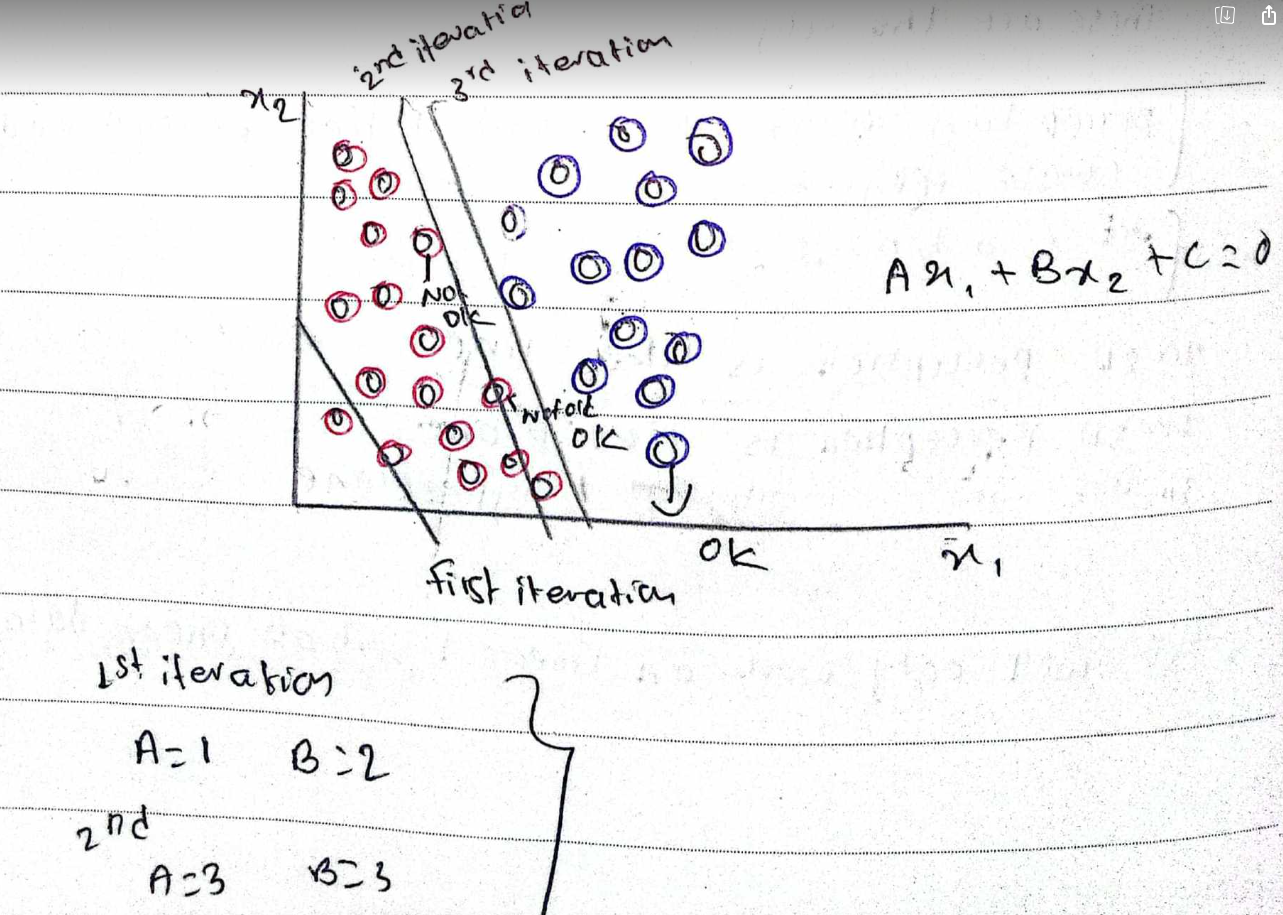

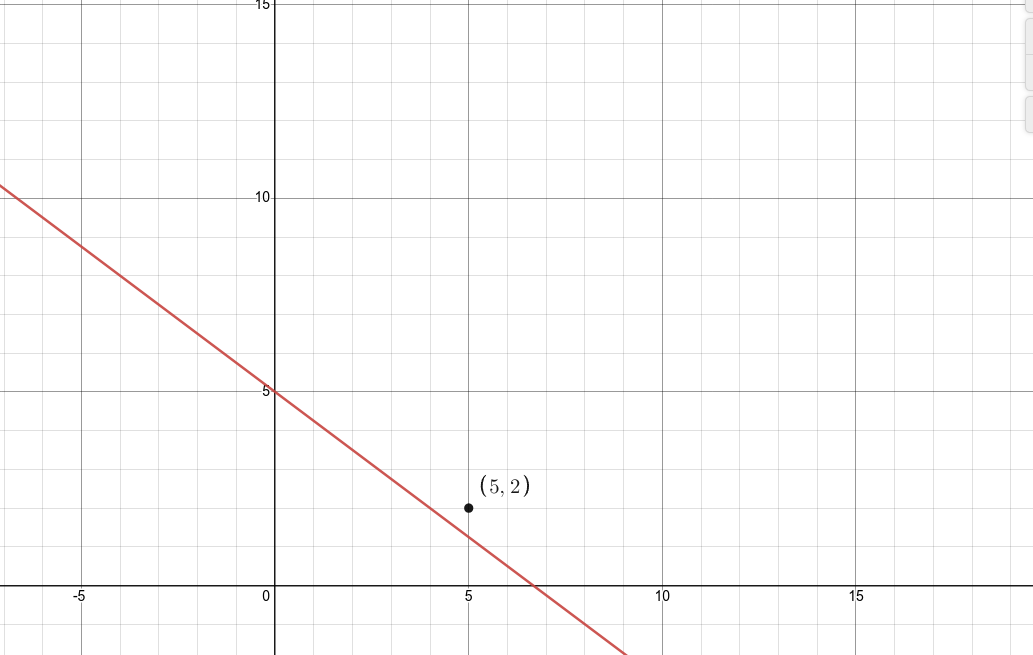

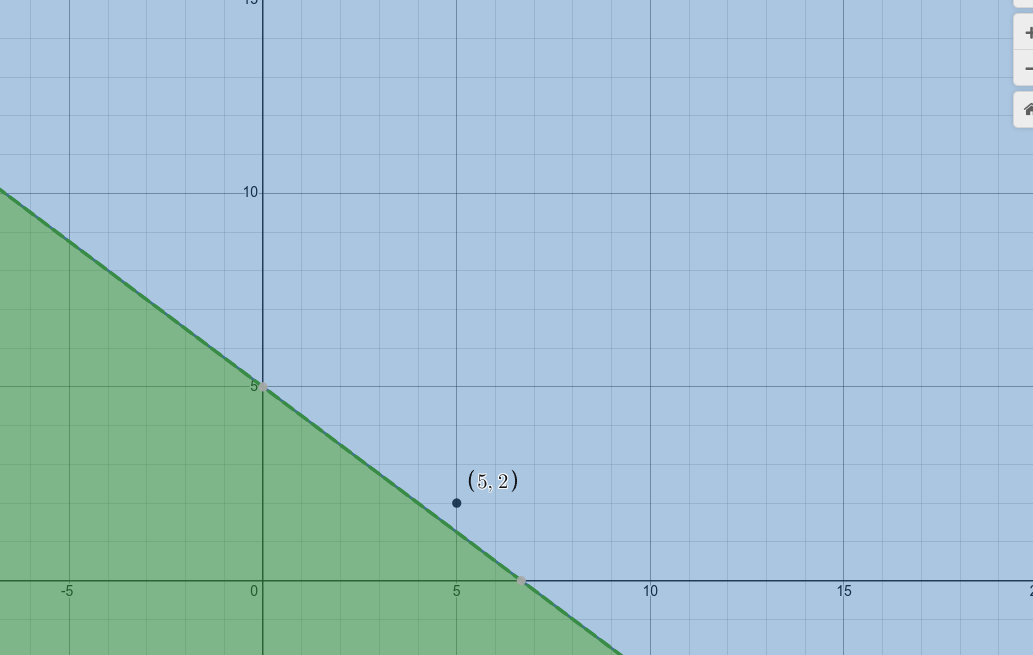
- Negative-> Green
- Positive->  Blue

- Supposing we have the red line, the equation is $3x + 4y - 20 = 0

- here suppose $(5,2)$ has been misclassified.
- Next, we will select that point and do a transformation like below.

> $3,4,-20 $

> $5, 2, 1 (we will add 1).

> subtract from the misclassified coordinate

> $-2x+2y-21=0$

- After that, we get

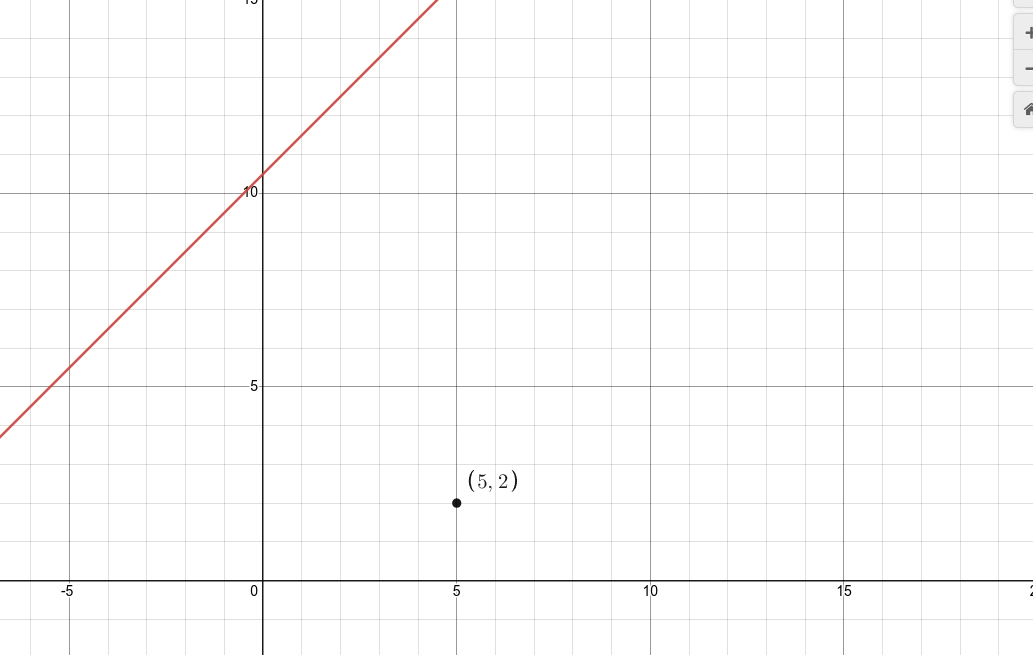
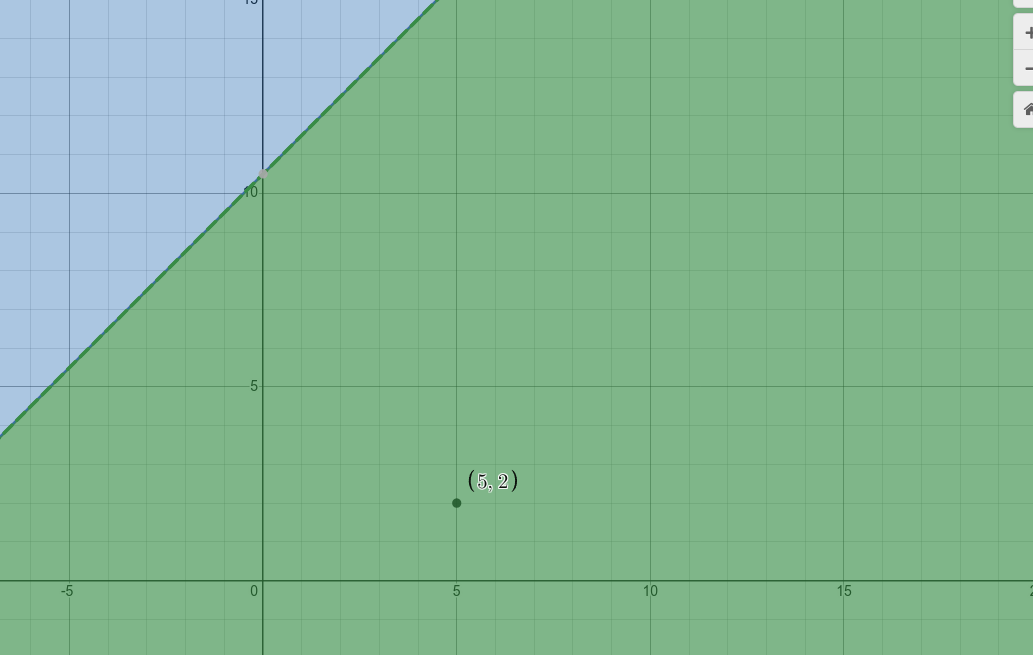


**We cannot do that much transformation in the line, so we will use the concept of the learning rate, where we will multiply the coordinate value with the learning rate.**

# Algo code

In [141]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [174]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_informative=1,n_classes=2,n_clusters_per_class=1,random_state=68)

In [175]:
X.shape,y.shape

((1000, 2), (1000,))

<Axes: >

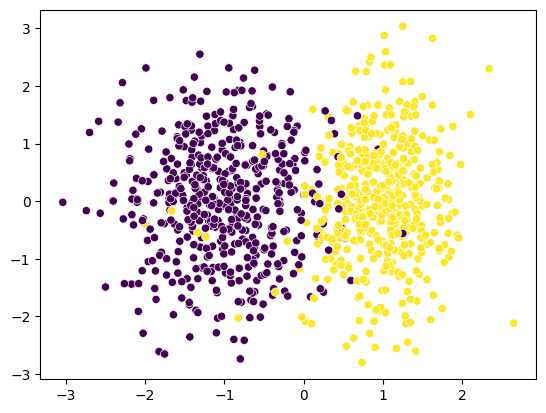

In [176]:
sns.scatterplot(x=X[:,0],y=X[:,1],c=y)

In [222]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    learning_rate = 0.1
    epoch=100000
    
    for i in range(epoch):
        j = np.random.randint(0,1000)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + learning_rate*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]


In [223]:
intercept_,coef_ = perceptron(X,y)


In [224]:
intercept_

-0.09999999999999987

In [225]:
coef_

array([ 0.29425532, -0.01530066])

In [226]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [227]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

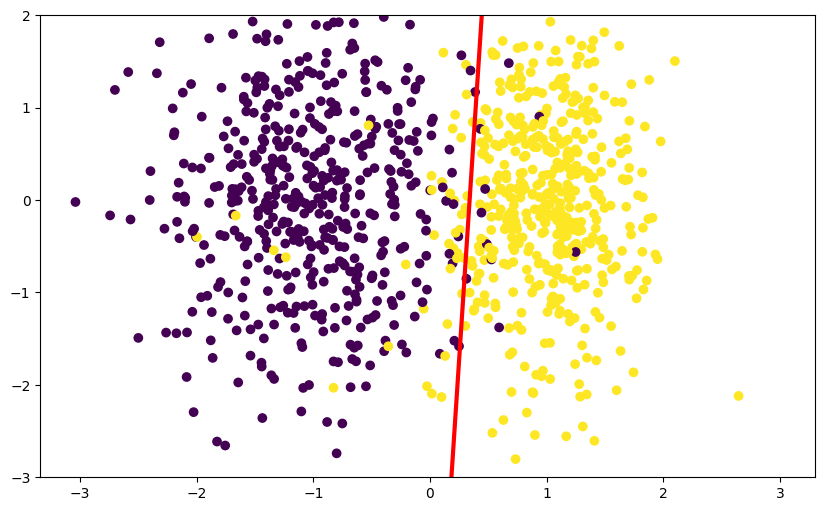

In [228]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x=X[:,0],y=X[:,1],c=y)
plt.ylim(-3,2)

# Using Library

In [229]:
perceptron_lib=Perceptron()

In [230]:
perceptron_lib.fit(X,y)

Perceptron()

In [231]:
perceptron_lib.intercept_

array([0.])

In [232]:
perceptron_lib.coef_

array([[ 3.71222522, -0.22330309]])

<Axes: >

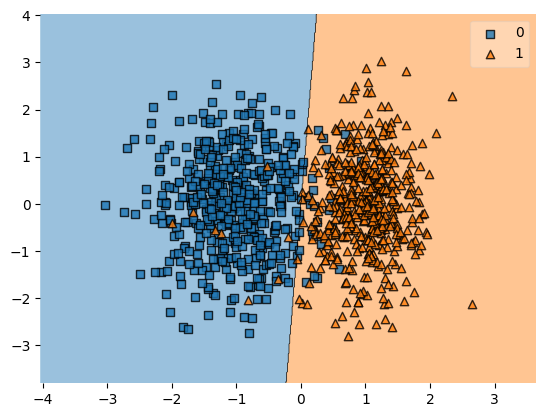

In [233]:
plot_decision_regions(X,y,clf=perceptron_lib)
